## Q1.  code

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
dataset = pd.read_csv("Bengaluru_House_Data.zip")

In [42]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [40]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 6
Integer variables: 0
Float variables: 3


/tmp/ipykernel_3162/3487798585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<AxesSubplot: >

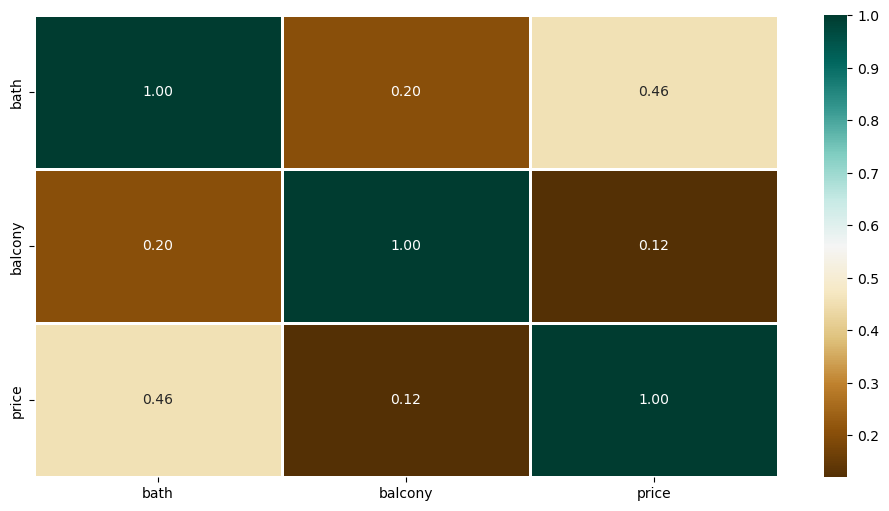

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<AxesSubplot: title={'center': 'No. Unique values of Categorical Features'}>

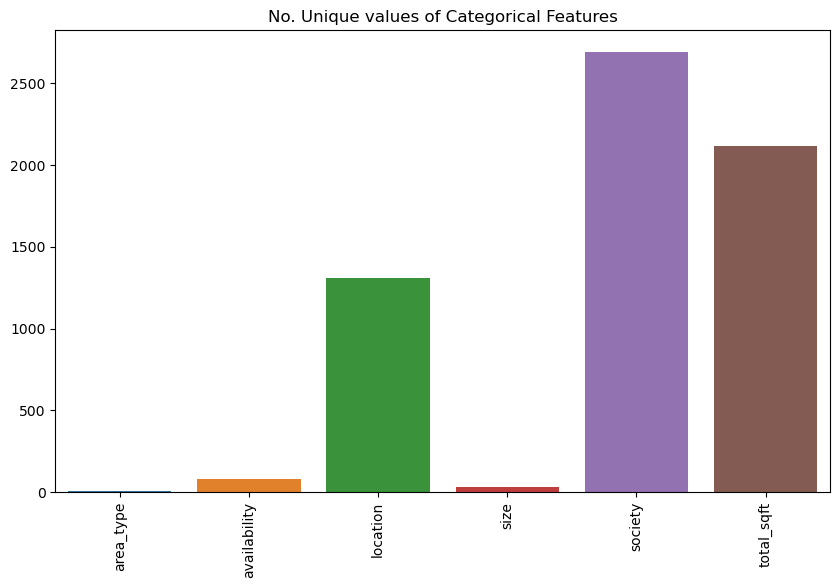

In [33]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

/tmp/ipykernel_3162/2166598984.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


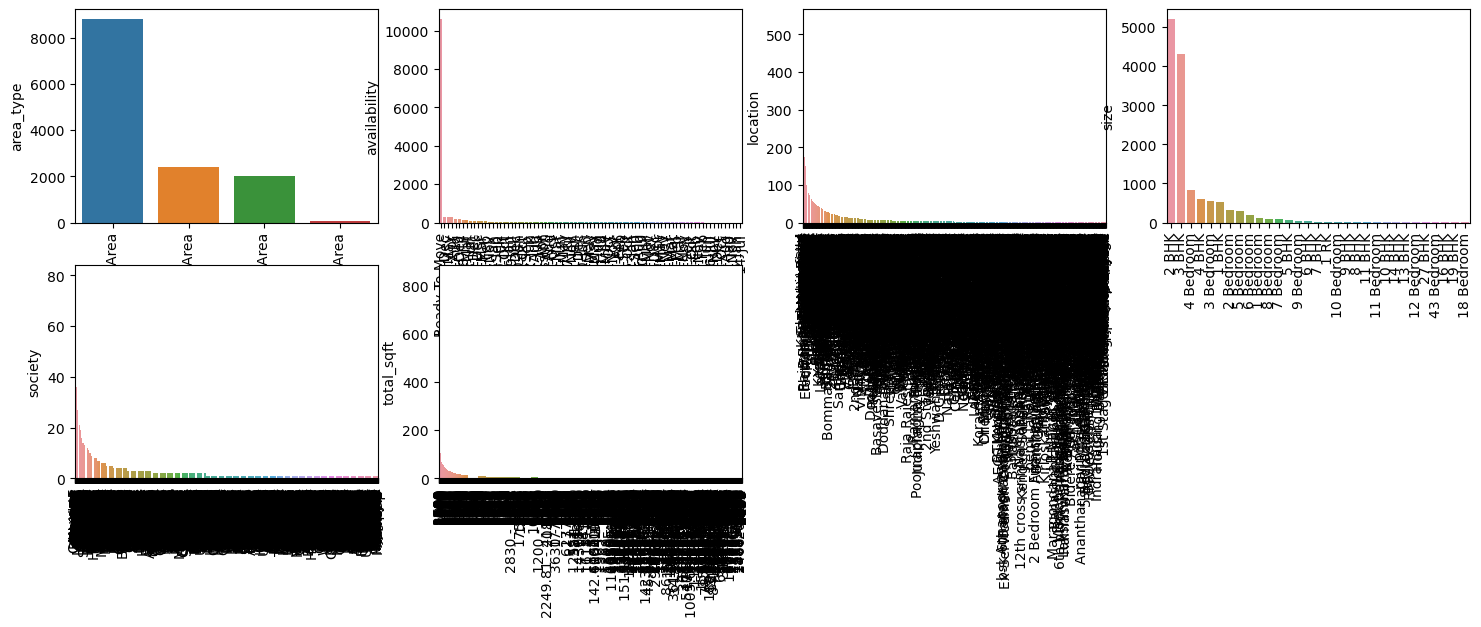

In [32]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [ ]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [ ]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

In [ ]:
new_dataset = dataset.dropna()

In [ ]:
new_dataset.isnull().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

In [ ]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

In [ ]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_valid)
 
cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score